In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
dft_products = pd.read_csv('train/df_Products.csv')
dft_products

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,90K0C1fIyQUf,toys,491.0,19.0,12.0,16.0
1,qejhpMGGVcsl,watches_gifts,440.0,18.0,14.0,17.0
2,qUS5d2pEAyxJ,costruction_tools_garden,2200.0,16.0,16.0,16.0
3,639iGvMyv0De,toys,1450.0,68.0,3.0,48.0
4,1lycYGcsic2F,toys,300.0,17.0,4.0,12.0
...,...,...,...,...,...,...
89311,W8vikEizUggJ,toys,700.0,21.0,14.0,14.0
89312,KXSbyJWtMMwZ,toys,600.0,16.0,16.0,16.0
89313,EG4wDSpFyTth,health_beauty,250.0,22.0,10.0,18.0
89314,ZWyg4uNWPHjJ,toys,250.0,16.0,2.0,11.0


In [3]:
dft_payments = pd.read_csv('train/df_Payments.csv')
dft_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,Axfy13Hk4PIk,1,credit_card,1,259.14
1,v6px92oS8cLG,1,credit_card,8,382.39
2,Ulpf9skrhjfm,1,credit_card,4,249.25
3,bwJVWupf2keN,1,credit_card,2,27.79
4,Dd0QnrMk9Cj5,1,credit_card,1,76.15
...,...,...,...,...,...
89311,zlcLnXGgAabl,1,wallet,1,128.00
89312,IlTAoIkILwrq,1,wallet,1,106.86
89313,uA6oXfftGVmT,1,credit_card,1,376.39
89314,v3QtU6xlGDJp,1,voucher,1,48.05


In [4]:
dft_orders = pd.read_csv('train/df_Orders.csv')
dft_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18
...,...,...,...,...,...,...,...
89311,zlcLnXGgAabl,bfJtzkBGksdY,delivered,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04
89312,IlTAoIkILwrq,4hjsCpj6FC7g,delivered,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04
89313,uA6oXfftGVmT,DLn56oKHl9bv,delivered,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01
89314,v3QtU6xlGDJp,auSfRYUQUOIq,delivered,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17


In [5]:
dft_orderitems = pd.read_csv('train/df_OrderItems.csv')
dft_orderitems

,order_id,product_id,seller_id,price,shipping_charges
0,Axfy13Hk4PIk,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65
1,v6px92oS8cLG,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79
2,Ulpf9skrhjfm,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,17.38
3,bwJVWupf2keN,639iGvMyv0De,jWzS0ayv9TGf,264.50,30.72
4,Dd0QnrMk9Cj5,1lycYGcsic2F,l1pYW6GBnPMr,779.90,30.66
...,...,...,...,...,...
89311,zlcLnXGgAabl,W8vikEizUggJ,2QjevWskirjm,31.99,188.65
89312,IlTAoIkILwrq,KXSbyJWtMMwZ,BFS9XJPapWv0,282.00,1.64
89313,uA6oXfftGVmT,EG4wDSpFyTth,TuPm19CMKvrM,58.10,4.09
89314,v3QtU6xlGDJp,ZWyg4uNWPHjJ,yGbPyLPc8PmT,2899.00,113.01


In [6]:
dft_customers = pd.read_csv('train/df_Customers.csv')
dft_customers

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,hCT0x9JiGXBQ,58125,varzea paulista,SP
1,PxA7fv9spyhx,3112,armacao dos buzios,RJ
2,g3nXeJkGI0Qw,4119,jandira,SP
3,EOEsCQ6QlpIg,18212,uberlandia,MG
4,mVz5LO2Vd6cL,88868,ilhabela,SP
...,...,...,...,...
89311,bfJtzkBGksdY,94060,amparo,SP
89312,4hjsCpj6FC7g,99835,itapevi,SP
89313,DLn56oKHl9bv,2540,sao paulo,SP
89314,auSfRYUQUOIq,12288,paulinia,SP


# EDA

## DF Products EDA

In [7]:
dft_products.duplicated().sum()

61865

In [8]:
duplicates = dft_products[dft_products.duplicated('product_id', keep=False)]
duplicate_counts = duplicates['product_id'].value_counts()

print("Duplicated values and their counts: \n")
print(duplicate_counts)

Duplicated values and their counts: 

0vbEvli2JYJu    405
UgkSjxoiV9Ev    383
9NwzO0Pm0fDM    383
SLTlrWtcYt1m    321
Biwi1BNtUB7l    295
               ... 
N7kzArDjkVku      2
lvWg0TQ5kWBT      2
Awz9FAjPTQDE      2
1fYhNqhNEoln      2
WPCsucIEHiJk      2
Name: product_id, Length: 12796, dtype: int64


In [9]:
dft_products.isnull().sum()

product_id                 0
product_category_name    308
product_weight_g          15
product_length_cm         15
product_height_cm         15
product_width_cm          15
dtype: int64

In [10]:
mask_dft_null = dft_products[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].isna().any(axis=1)
dft_products[mask_dft_null]

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
2150,zX9HL81jfvr2,toys,NaN,NaN,NaN,NaN
7473,zX9HL81jfvr2,toys,NaN,NaN,NaN,NaN
13628,VqyFCmRtRdfR,toys,NaN,NaN,NaN,NaN
28114,zX9HL81jfvr2,toys,NaN,NaN,NaN,NaN
32791,zX9HL81jfvr2,toys,NaN,NaN,NaN,NaN
38130,zX9HL81jfvr2,toys,NaN,NaN,NaN,NaN
39021,zX9HL81jfvr2,toys,NaN,NaN,NaN,NaN
49124,zX9HL81jfvr2,toys,NaN,NaN,NaN,NaN
55696,zX9HL81jfvr2,toys,NaN,NaN,NaN,NaN
56195,zX9HL81jfvr2,toys,NaN,NaN,NaN,NaN


> Karena datanya 'Completely Missing at Random' maka kita bisa melakukan CCA atau drop null

In [11]:
null_dft = dft_products[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']]

In [12]:
dft_products.dropna(axis=0, subset=null_dft.columns, inplace=True)

In [13]:
dft_products.isnull().sum() / len(dft_products)

product_id               0.000000
product_category_name    0.003449
product_weight_g         0.000000
product_length_cm        0.000000
product_height_cm        0.000000
product_width_cm         0.000000
dtype: float64

In [14]:
mask_dft_null = dft_products['product_category_name'].isna()
dft_products[mask_dft_null].head(10)

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
329,6cDVtksZH7KU,NaN,200.0,16.0,2.0,11.0
1037,z6g5uM3fiCVO,NaN,300.0,30.0,6.0,12.0
1179,N6XMQZiwCJ3t,NaN,600.0,24.0,4.0,15.0
1589,W3IIy0dnIfkU,NaN,200.0,16.0,2.0,11.0
3061,Z2X9RgoeYqaj,NaN,6250.0,28.0,34.0,40.0
3210,CLZ9JZqycnNT,NaN,10750.0,34.0,20.0,30.0
3632,x6gerAoELDdu,NaN,500.0,24.0,4.0,15.0
3752,sNtRBW3JfRjj,NaN,400.0,18.0,7.0,17.0
3825,OyECAoOQX8Ah,NaN,2300.0,29.0,13.0,25.0
4444,PP5cKHUvzDD5,NaN,600.0,35.0,35.0,15.0


In [15]:
# Checking unique data
dft_products.nunique()

product_id               27449
product_category_name       70
product_weight_g          2020
product_length_cm           99
product_height_cm          101
product_width_cm            93
dtype: int64

In [16]:
dft_products['product_quantity'] = dft_products.groupby('product_id')['product_id'].transform('count')
dft_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89301 entries, 0 to 89315
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             89301 non-null  object 
 1   product_category_name  88993 non-null  object 
 2   product_weight_g       89301 non-null  float64
 3   product_length_cm      89301 non-null  float64
 4   product_height_cm      89301 non-null  float64
 5   product_width_cm       89301 non-null  float64
 6   product_quantity       89301 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 5.5+ MB


In [17]:
dft_products = dft_products.drop_duplicates(subset='product_id')

In [18]:
dft_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27449 entries, 0 to 89315
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             27449 non-null  object 
 1   product_category_name  27308 non-null  object 
 2   product_weight_g       27449 non-null  float64
 3   product_length_cm      27449 non-null  float64
 4   product_height_cm      27449 non-null  float64
 5   product_width_cm       27449 non-null  float64
 6   product_quantity       27449 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 1.7+ MB


<AxesSubplot:>

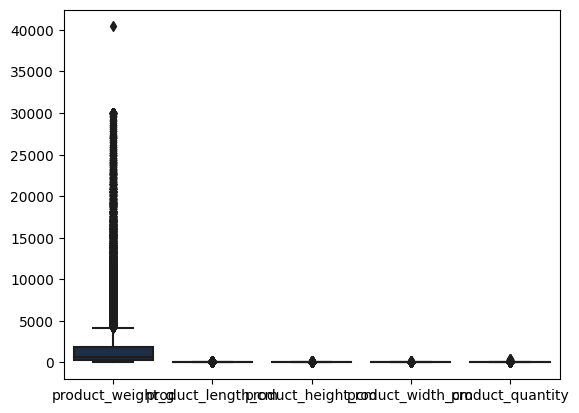

In [19]:
sns.boxplot(data=dft_products,palette='cubehelix')

In [20]:
dft_products.describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_quantity
count,27449.000000,27449.000000,27449.000000,27449.000000,27449.000000
mean,2249.476994,30.714015,16.896426,23.122045,3.253343
std,4219.591017,16.805513,13.633966,12.008406,9.031266
min,0.000000,7.000000,2.000000,6.000000,1.000000
25%,300.000000,18.000000,8.000000,15.000000,1.000000
50%,700.000000,25.000000,13.000000,20.000000,1.000000
75%,1850.000000,38.000000,20.000000,30.000000,3.000000
max,40425.000000,105.000000,105.000000,118.000000,405.000000


In [21]:
dft_products[dft_products['product_weight_g'] == 0]

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_quantity
1476,fsq5lo34nHGK,toys,0.0,30.0,25.0,30.0,2
51136,aMbBkxpim3xt,toys,0.0,30.0,25.0,30.0,2
65518,nm5AMMVOx4Ac,toys,0.0,30.0,25.0,30.0,1
83528,xUlGNJzxYn1N,toys,0.0,30.0,25.0,30.0,1


## DF Payments EDA

In [22]:
dft_payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [23]:
dft_payments.duplicated().sum()

0

In [24]:
dft_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              89316 non-null  object 
 1   payment_sequential    89316 non-null  int64  
 2   payment_type          89316 non-null  object 
 3   payment_installments  89316 non-null  int64  
 4   payment_value         89316 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.4+ MB


In [25]:
dft_payments.describe()

,payment_sequential,payment_installments,payment_value
count,89316.000000,89316.000000,89316.000000
mean,1.099646,2.965717,268.657190
std,0.772658,2.796406,344.409566
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,84.340000
50%,1.000000,2.000000,171.860000
75%,1.000000,4.000000,313.530000
max,29.000000,24.000000,7274.880000


In [26]:
dft_payments[dft_payments['payment_installments'] == 5]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
7,VEDSMTavbQwk,1,credit_card,5,146.51
160,BERp5cg4oEws,1,credit_card,5,231.76
165,dZuZBawSN57o,1,credit_card,5,183.40
173,TTBF9yOgN5EH,1,credit_card,5,254.19
195,MnaiNSJ6870y,1,credit_card,5,71.34
...,...,...,...,...,...
89204,CpcyAe7A6RCY,1,credit_card,5,185.89
89224,vm5VZGFFOqhQ,1,credit_card,5,386.76
89250,AYWBDUKtHx0m,1,credit_card,5,251.80
89263,0n06UN7fvlVZ,1,credit_card,5,255.69


In [27]:
dft_payments['payment_installments'].value_counts().sort_index()

0         3
1     44313
2     10325
3      8907
4      6032
5      4600
6      3580
7      1401
8      3927
9       560
10     5331
11       18
12      128
13       17
14       11
15       73
16        6
17        6
18       26
20       16
21       10
22        1
23        1
24       24
Name: payment_installments, dtype: int64

In [28]:
dft_payments[dft_payments['payment_value'] == 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
65644,gZkNlHVVt1Xp,1,credit_card,8,0.0


In [29]:
dft_payments.drop(dft_payments[dft_payments['payment_value'] == 0].index, inplace=True)

In [30]:
dft_payments.describe()

,payment_sequential,payment_installments,payment_value
count,89315.000000,89315.000000,89315.000000
mean,1.099647,2.965661,268.660198
std,0.772663,2.796371,344.410321
min,1.000000,0.000000,0.010000
25%,1.000000,1.000000,84.350000
50%,1.000000,2.000000,171.860000
75%,1.000000,4.000000,313.530000
max,29.000000,24.000000,7274.880000


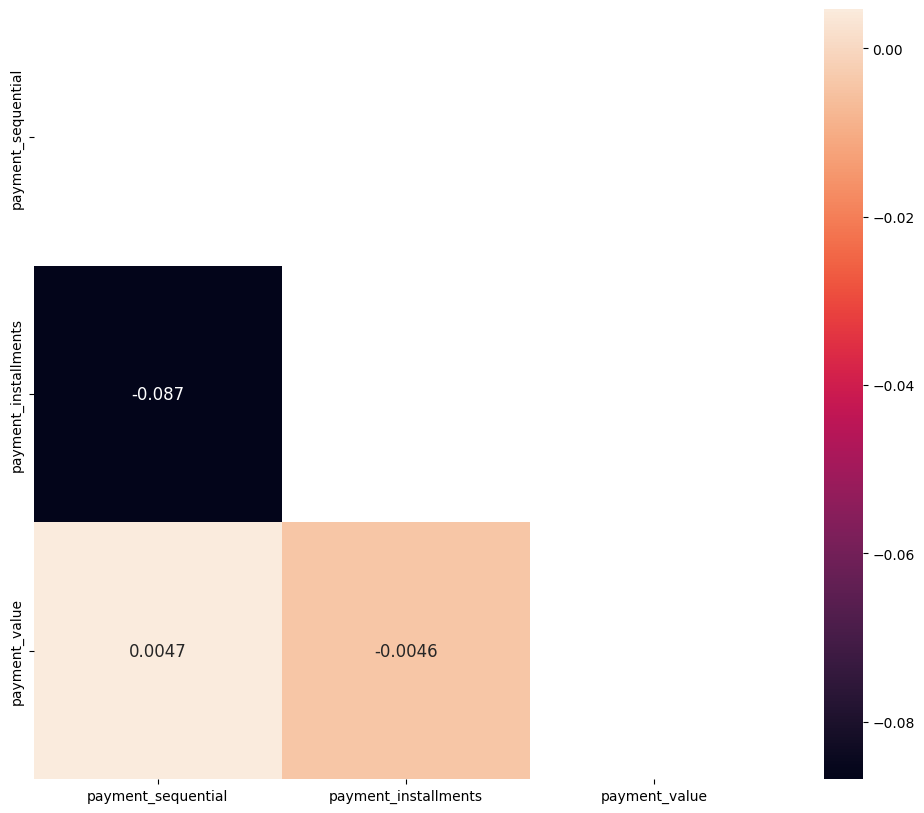

In [31]:
dft_payments_corr = dft_payments.corr()

plt.figure(figsize=(12,10))
sns.heatmap(dft_payments_corr, annot=True,annot_kws={'size':12},mask=np.triu(dft_payments_corr))

plt.show()

In [32]:
dft_payments['payment_type'].unique()

array(['credit_card', 'wallet', 'voucher', 'debit_card'], dtype=object)

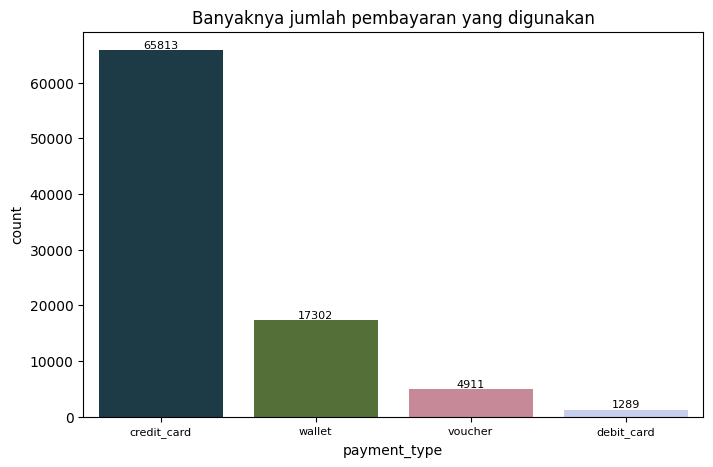

In [33]:
plt.figure(figsize = (8,5))
ax = sns.countplot(data = dft_payments,x = "payment_type", palette ='cubehelix')
plt.title("Banyaknya jumlah pembayaran yang digunakan")
ax.set_xticklabels(ax.get_xticklabels(), ha='center', fontsize=8)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8)


plt.show()

## DF Orders EDA

In [34]:
dft_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   9
order_delivered_timestamp        1889
order_estimated_delivery_date       0
dtype: int64

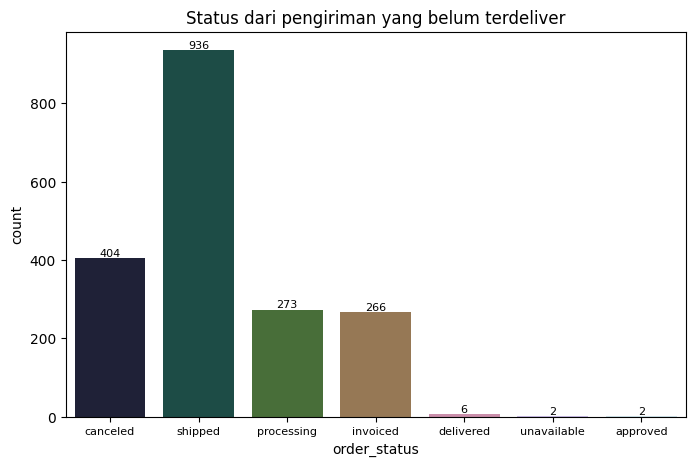

In [35]:
mask_deliv = dft_orders['order_delivered_timestamp'].isnull()

order_ndelivered = dft_orders[mask_deliv]

plt.figure(figsize = (8,5))
ax = sns.countplot(data = order_ndelivered,x = "order_status", palette ='cubehelix')
plt.title("Status dari pengiriman yang belum terdeliver")
ax.set_xticklabels(ax.get_xticklabels(), ha='center', fontsize=8)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8)


plt.show()

In [36]:
dft_orders['order_status'].value_counts()

delivered      87428
shipped          936
canceled         409
processing       273
invoiced         266
unavailable        2
approved           2
Name: order_status, dtype: int64

> kita ingin memprediksi karena ini sebenarnya banyak barang yang sudah shipped, jadi kenapa tanggal deliverednya gada. Kita mau masukkin rata2 lama sampai setelah approved di kota tersebut

In [37]:
dft_orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08


In [38]:
filtered_orders = dft_orders[(dft_orders['order_status'] == 'delivered') & (dft_orders['order_delivered_timestamp'].isnull())]
filtered_orders.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
4254,t5kBjEdw3z8t,ZeIXZ7BBF5PP,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,NaN,2017-12-18
13268,BxxG20QRNt7K,RWhfv6bIMVsQ,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,NaN,2018-07-16
30892,yRSiD6TjWuMp,WrJg7MJuozgD,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,NaN,2018-07-30
65263,1XWJAxXBtYuW,Z5AHwQM14J3A,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,NaN,2018-06-26
65525,H6OIR9EVCoos,53rYCxN5t4tp,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,NaN,2018-07-19
67317,EznMwXRSIZcm,RMR2x4OEJS2K,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,NaN,2018-07-30


In [39]:
filtered_orders2 = dft_orders[(dft_orders['order_status'] == 'delivered') & (dft_orders['order_approved_at'].isnull())]
filtered_orders2.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
10788,4Itts2TBUQzs,Z3dI7uRBfJOD,delivered,2017-02-17 13:05:55,NaN,2017-03-02 11:09:19,2017-03-20
16137,6MPB830Ufh0n,SOtqXN1MqcLj,delivered,2017-02-17 17:21:55,NaN,2017-03-03 12:16:03,2017-03-20
28951,lqW95yj4n1Qd,jCPmhkcyVR1z,delivered,2017-02-18 15:52:27,NaN,2017-03-07 13:57:47,2017-03-29
30494,dn1i9D4DFVZ2,Es95IGZCDDXy,delivered,2017-02-17 15:53:27,NaN,2017-03-03 11:47:47,2017-03-23
41752,vBZCEuCG9Hf1,zHEH7vdeO6UZ,delivered,2017-02-18 11:04:19,NaN,2017-03-02 16:15:23,2017-03-22
42772,PXwPIjmXCehX,gjKhFw8AFnW1,delivered,2017-02-18 16:48:35,NaN,2017-03-09 07:28:47,2017-03-31
47768,Yg9HDkWtA3Q3,GFg4QWN26cLs,delivered,2017-02-19 01:28:47,NaN,2017-03-02 03:41:58,2017-03-27
59434,hynO4uEubWbe,QdQBjy8APVMg,delivered,2017-02-18 14:40:00,NaN,2017-03-01 13:25:33,2017-03-17
65247,Uso7EoEPMrLU,rKJOxQc2PTfc,delivered,2017-01-19 22:26:59,NaN,2017-02-06 14:22:19,2017-03-16


In [40]:
filtered_orders3 = dft_orders[(dft_orders['order_status'] == 'delivered') & (dft_orders['order_estimated_delivery_date'].isnull())]
filtered_orders3.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date


In [41]:
fill_mean_delivered = pd.merge(filtered_orders, dft_customers, on='customer_id')

In [42]:
fill_mean_delivered

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state
0,t5kBjEdw3z8t,ZeIXZ7BBF5PP,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,NaN,2017-12-18,4931,cerquilho,SP
1,BxxG20QRNt7K,RWhfv6bIMVsQ,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,NaN,2018-07-16,30270,quadra,SP
2,yRSiD6TjWuMp,WrJg7MJuozgD,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,NaN,2018-07-30,9432,sumare,SP
3,1XWJAxXBtYuW,Z5AHwQM14J3A,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,NaN,2018-06-26,2349,guarulhos,SP
4,H6OIR9EVCoos,53rYCxN5t4tp,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,NaN,2018-07-19,53423,ribeirao pires,SP
5,EznMwXRSIZcm,RMR2x4OEJS2K,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,NaN,2018-07-30,58423,pindamonhangaba,SP


In [43]:
df_4_mean = pd.merge(dft_orders, dft_customers, on='customer_id')
df_4_mean = df_4_mean[['customer_id', 'order_status', 'order_approved_at', 'order_delivered_timestamp', 'customer_zip_code_prefix']]
df_4_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89316 entries, 0 to 89315
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   customer_id                89316 non-null  object
 1   order_status               89316 non-null  object
 2   order_approved_at          89307 non-null  object
 3   order_delivered_timestamp  87427 non-null  object
 4   customer_zip_code_prefix   89316 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 4.1+ MB


In [44]:
df_4_mean['customer_zip_code_prefix'].nunique()

13930

In [45]:
df_4_mean['order_approved_at'] = pd.to_datetime(df_4_mean['order_approved_at'])
df_4_mean['order_delivered_timestamp'] = pd.to_datetime(df_4_mean['order_delivered_timestamp'])
df_4_mean['order_approved_at'] = df_4_mean['order_approved_at'].dt.strftime('%Y-%m-%d')
df_4_mean['order_delivered_timestamp'] = df_4_mean['order_delivered_timestamp'].dt.strftime('%Y-%m-%d')
df_4_mean.head()

,customer_id,order_status,order_approved_at,order_delivered_timestamp,customer_zip_code_prefix
0,hCT0x9JiGXBQ,delivered,2017-10-22,2017-10-26,58125
1,PxA7fv9spyhx,delivered,2018-06-20,2018-07-03,3112
2,g3nXeJkGI0Qw,delivered,2018-02-17,2018-02-27,4119
3,EOEsCQ6QlpIg,delivered,2018-08-18,2018-08-27,18212
4,mVz5LO2Vd6cL,delivered,2017-12-22,2018-01-05,88868


In [46]:
df_4_mean_fix = df_4_mean[df_4_mean['order_status'] == 'delivered']
df_4_mean_fix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87428 entries, 0 to 89315
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   customer_id                87428 non-null  object
 1   order_status               87428 non-null  object
 2   order_approved_at          87419 non-null  object
 3   order_delivered_timestamp  87422 non-null  object
 4   customer_zip_code_prefix   87428 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 4.0+ MB


In [47]:
df_4_mean_fix['order_delivered_timestamp'] = pd.to_datetime(df_4_mean_fix['order_delivered_timestamp'])
df_4_mean_fix['order_approved_at'] = pd.to_datetime(df_4_mean_fix['order_approved_at'])

df_4_mean_fix['Delivery Time'] = (df_4_mean_fix['order_delivered_timestamp'] - df_4_mean_fix['order_approved_at']).dt.days

df_4_mean_fix.head()


,customer_id,order_status,order_approved_at,order_delivered_timestamp,customer_zip_code_prefix,Delivery Time
0,hCT0x9JiGXBQ,delivered,2017-10-22,2017-10-26,58125,4.0
1,PxA7fv9spyhx,delivered,2018-06-20,2018-07-03,3112,13.0
2,g3nXeJkGI0Qw,delivered,2018-02-17,2018-02-27,4119,10.0
3,EOEsCQ6QlpIg,delivered,2018-08-18,2018-08-27,18212,9.0
4,mVz5LO2Vd6cL,delivered,2017-12-22,2018-01-05,88868,14.0


In [48]:
mean_del_date = df_4_mean_fix.groupby('customer_zip_code_prefix').mean().reset_index()
mean_del_date.head()

,customer_zip_code_prefix,Delivery Time
0,1003,17.333333
1,1004,10.285714
2,1005,14.333333
3,1006,17.333333
4,1007,9.500000


In [49]:
customer_ids_to_select = ['ZeIXZ7BBF5PP', 'RWhfv6bIMVsQ', 'WrJg7MJuozgD', 'Z5AHwQM14J3A', '53rYCxN5t4tp', 'RMR2x4OEJS2K']
df_4_mean[df_4_mean['customer_id'].isin(customer_ids_to_select)]

,customer_id,order_status,order_approved_at,order_delivered_timestamp,customer_zip_code_prefix
4254,ZeIXZ7BBF5PP,delivered,2017-11-28,NaN,4931
13268,RWhfv6bIMVsQ,delivered,2018-06-20,NaN,30270
30892,WrJg7MJuozgD,delivered,2018-07-01,NaN,9432
65263,Z5AHwQM14J3A,delivered,2018-06-08,NaN,2349
65525,53rYCxN5t4tp,delivered,2018-06-27,NaN,53423
67317,RMR2x4OEJS2K,delivered,2018-07-01,NaN,58423


In [50]:
list_null_cust = [4931, 30270, 9432, 2349, 53423, 58423]

for i in list_null_cust:
    mean_time = mean_del_date[mean_del_date['customer_zip_code_prefix'] == i]['Delivery Time'].values[0]
    print(f'The mean time for delivery at {i} zipcode: {mean_time} days')

The mean time for delivery at 4931 zipcode: 10.848484848484848 days
The mean time for delivery at 30270 zipcode: 9.0 days
The mean time for delivery at 9432 zipcode: 9.0 days
The mean time for delivery at 2349 zipcode: 4.0 days
The mean time for delivery at 53423 zipcode: 5.0 days
The mean time for delivery at 58423 zipcode: 6.0 days


In [51]:
df_4_mean = df_4_mean[df_4_mean['order_status'] == 'delivered'].reset_index()
null_delivered = df_4_mean['order_delivered_timestamp'].isnull()

df_4_mean[null_delivered]

,index,customer_id,order_status,order_approved_at,order_delivered_timestamp,customer_zip_code_prefix
4163,4254,ZeIXZ7BBF5PP,delivered,2017-11-28,NaN,4931
13001,13268,RWhfv6bIMVsQ,delivered,2018-06-20,NaN,30270
30236,30892,WrJg7MJuozgD,delivered,2018-07-01,NaN,9432
63904,65263,Z5AHwQM14J3A,delivered,2018-06-08,NaN,2349
64159,65525,53rYCxN5t4tp,delivered,2018-06-27,NaN,53423
65916,67317,RMR2x4OEJS2K,delivered,2018-07-01,NaN,58423


In [52]:
# Create a dictionary mapping zip codes to their mean delivery times
zip_mean_time_mapping = {
    4931: 10.848484848484848,
    30270: 9.0,
    9432: 9.0,
    2349: 4.0,
    53423: 5.0,
    58423: 6.0
}

# Fill missing values in 'Delivery Time' based on the mapping
for zip_code, mean_time in zip_mean_time_mapping.items():
    condition = (df_4_mean_fix['customer_zip_code_prefix'] == zip_code) & df_4_mean_fix['Delivery Time'].isna()
    df_4_mean_fix.loc[condition, 'Delivery Time'] = mean_time

# Display the updated DataFrame
df_4_mean_fix

,customer_id,order_status,order_approved_at,order_delivered_timestamp,customer_zip_code_prefix,Delivery Time
0,hCT0x9JiGXBQ,delivered,2017-10-22,2017-10-26,58125,4.0
1,PxA7fv9spyhx,delivered,2018-06-20,2018-07-03,3112,13.0
2,g3nXeJkGI0Qw,delivered,2018-02-17,2018-02-27,4119,10.0
3,EOEsCQ6QlpIg,delivered,2018-08-18,2018-08-27,18212,9.0
4,mVz5LO2Vd6cL,delivered,2017-12-22,2018-01-05,88868,14.0
...,...,...,...,...,...,...
89311,bfJtzkBGksdY,delivered,2018-08-21,2018-08-30,94060,9.0
89312,4hjsCpj6FC7g,delivered,2017-12-16,2017-12-20,99835,4.0
89313,DLn56oKHl9bv,delivered,2018-07-24,2018-07-27,2540,3.0
89314,auSfRYUQUOIq,delivered,2018-08-11,2018-08-14,12288,3.0


In [53]:
df_4_mean[df_4_mean['order_delivered_timestamp'].isnull()]

,index,customer_id,order_status,order_approved_at,order_delivered_timestamp,customer_zip_code_prefix
4163,4254,ZeIXZ7BBF5PP,delivered,2017-11-28,NaN,4931
13001,13268,RWhfv6bIMVsQ,delivered,2018-06-20,NaN,30270
30236,30892,WrJg7MJuozgD,delivered,2018-07-01,NaN,9432
63904,65263,Z5AHwQM14J3A,delivered,2018-06-08,NaN,2349
64159,65525,53rYCxN5t4tp,delivered,2018-06-27,NaN,53423
65916,67317,RMR2x4OEJS2K,delivered,2018-07-01,NaN,58423


In [54]:
df_4_mean_fix[df_4_mean_fix['order_delivered_timestamp'].isnull()]

,customer_id,order_status,order_approved_at,order_delivered_timestamp,customer_zip_code_prefix,Delivery Time
4254,ZeIXZ7BBF5PP,delivered,2017-11-28,NaT,4931,10.848485
13268,RWhfv6bIMVsQ,delivered,2018-06-20,NaT,30270,9.000000
30892,WrJg7MJuozgD,delivered,2018-07-01,NaT,9432,9.000000
65263,Z5AHwQM14J3A,delivered,2018-06-08,NaT,2349,4.000000
65525,53rYCxN5t4tp,delivered,2018-06-27,NaT,53423,5.000000
67317,RMR2x4OEJS2K,delivered,2018-07-01,NaT,58423,6.000000


In [55]:
# Assuming df_4_mean_fix is your DataFrame
df_4_mean_fix['order_approved_at'] = pd.to_datetime(df_4_mean_fix['order_approved_at'])  # Convert to datetime

# Calculate 'order_delivered_timestamp' based on 'order_approved_at' + 'Delivery Time' in days
mask_null = df_4_mean_fix['order_delivered_timestamp'].isnull()
df_4_mean_fix.loc[mask_null, 'order_delivered_timestamp'] = df_4_mean_fix.loc[mask_null, 'order_approved_at'] + pd.to_timedelta(df_4_mean_fix.loc[mask_null, 'Delivery Time'], unit='D')

# Display the updated DataFrame
df_4_mean_fix[df_4_mean_fix['customer_id'] == "ZeIXZ7BBF5PP"]

,customer_id,order_status,order_approved_at,order_delivered_timestamp,customer_zip_code_prefix,Delivery Time
4254,ZeIXZ7BBF5PP,delivered,2017-11-28,2017-12-08 20:21:49.090867200,4931,10.848485


In [56]:
df_4_mean_fix['order_approved_at'] = pd.to_datetime(df_4_mean_fix['order_approved_at'])
df_4_mean_fix['order_delivered_timestamp'] = pd.to_datetime(df_4_mean_fix['order_delivered_timestamp'])
df_4_mean_fix['order_approved_at'] = df_4_mean_fix['order_approved_at'].dt.strftime('%Y-%m-%d')
df_4_mean_fix['order_delivered_timestamp'] = df_4_mean_fix['order_delivered_timestamp'].dt.strftime('%Y-%m-%d')

df_4_mean_fix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87428 entries, 0 to 89315
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                87428 non-null  object 
 1   order_status               87428 non-null  object 
 2   order_approved_at          87419 non-null  object 
 3   order_delivered_timestamp  87428 non-null  object 
 4   customer_zip_code_prefix   87428 non-null  int64  
 5   Delivery Time              87419 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 4.7+ MB


In [57]:
maskcheck = df_4_mean_fix['order_delivered_timestamp'].isnull()

df_4_mean_fix[maskcheck]

,customer_id,order_status,order_approved_at,order_delivered_timestamp,customer_zip_code_prefix,Delivery Time


In [58]:
df_4_mean_fix[df_4_mean_fix['customer_id'] == 'Z3dI7uRBfJOD']

,customer_id,order_status,order_approved_at,order_delivered_timestamp,customer_zip_code_prefix,Delivery Time
10788,Z3dI7uRBfJOD,delivered,NaN,2017-03-02,60441,NaN


In [59]:
df_4_mean_fix['customer_id'].duplicated().sum()

0

In [60]:
dft_orders2 = dft_orders.merge(df_4_mean_fix[['customer_id', 'order_delivered_timestamp']], on='customer_id')
dft_orders2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp_x,order_estimated_delivery_date,order_delivered_timestamp_y
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,2017-10-26
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,2018-07-03
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,2018-02-27
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,2018-08-27
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,2018-01-05


In [61]:
dft_orders2['order_delivered_timestamp'] = dft_orders2['order_delivered_timestamp_y']

# Drop the 'order_delivered_timestamp_y' column if no longer needed
dft_orders2.drop(columns=['order_delivered_timestamp_x', 'order_delivered_timestamp_y'], inplace=True)
dft_orders2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87428 entries, 0 to 87427
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       87428 non-null  object
 1   customer_id                    87428 non-null  object
 2   order_status                   87428 non-null  object
 3   order_purchase_timestamp       87428 non-null  object
 4   order_approved_at              87419 non-null  object
 5   order_estimated_delivery_date  87428 non-null  object
 6   order_delivered_timestamp      87428 non-null  object
dtypes: object(7)
memory usage: 5.3+ MB


In [62]:
dft_orders2['order_status'].value_counts()

delivered    87428
Name: order_status, dtype: int64

In [63]:
dft_orders[dft_orders['order_status'] == 'shipped']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
41,C21fWds5zL0W,iFsAJRrzVaTS,shipped,2017-02-04 12:58:55,2017-02-04 13:10:38,NaN,2017-03-15
86,vSug5AqRo9gE,oWBBqGwqpx4m,shipped,2017-05-07 10:22:58,2017-05-09 09:35:20,NaN,2017-06-12
135,gQPaVIZUm0jj,LFLEYmt3mGzI,shipped,2017-10-20 19:51:41,2017-10-20 20:05:36,NaN,2017-11-13
205,yWHy7JXGvc0Z,K344NrOcLCky,shipped,2018-01-18 04:37:44,2018-01-18 04:52:09,NaN,2018-02-22
262,p6iWM5qft7BH,XTOCrs09YhZc,shipped,2017-07-12 22:05:52,2017-07-14 02:25:32,NaN,2017-08-01
...,...,...,...,...,...,...,...
88802,Z2BLWRoHDxvh,939MDiVwtyHN,shipped,2017-04-16 06:31:08,2017-04-16 06:41:44,NaN,2017-05-11
89168,snTt1oxhyabE,CL6j3U6SCt17,shipped,2018-04-17 09:11:11,2018-04-17 09:31:33,NaN,2018-05-24
89196,VP3EBMExdh7K,acB2XNtto2SX,shipped,2018-01-24 18:19:18,2018-01-24 18:37:41,NaN,2018-03-01
89234,QzxMjvdMpOEI,yCbzy1m4tTUA,shipped,2017-09-15 09:05:41,2017-09-15 09:15:13,NaN,2017-10-05


In [64]:
dft_orders['order_delivered_timestamp'] = pd.to_datetime(dft_orders['order_delivered_timestamp'])
max_date = dft_orders['order_delivered_timestamp'].max()
last_day_orders = dft_orders[dft_orders['order_delivered_timestamp'] == max_date]


In [65]:
last_day_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
67050,MUTiAkk8Ohjx,0dP1RSBypl8a,delivered,2018-06-02 18:37:14,2018-06-02 18:51:31,2018-10-17 13:22:46,2018-07-13


In [66]:
dft_orders['order_status'].value_counts()

delivered      87428
shipped          936
canceled         409
processing       273
invoiced         266
unavailable        2
approved           2
Name: order_status, dtype: int64

In [67]:
dft_orders[dft_orders['order_status'] == 'shipped'].count()

order_id                         936
customer_id                      936
order_status                     936
order_purchase_timestamp         936
order_approved_at                936
order_delivered_timestamp          0
order_estimated_delivery_date    936
dtype: int64

In [68]:
fill_date = '2018-10-17 13:22:46'

# Fill NaN values in the "order_delivered_timestamp" column for "order_status" == 'shipped'
dft_orders.loc[dft_orders['order_status'] == 'shipped', 'order_delivered_timestamp'] = fill_date

# Print the updated DataFrame
dft_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18
...,...,...,...,...,...,...,...
89311,zlcLnXGgAabl,bfJtzkBGksdY,delivered,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04
89312,IlTAoIkILwrq,4hjsCpj6FC7g,delivered,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04
89313,uA6oXfftGVmT,DLn56oKHl9bv,delivered,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01
89314,v3QtU6xlGDJp,auSfRYUQUOIq,delivered,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17


In [69]:
dft_orders = dft_orders[(dft_orders['order_status'] == 'delivered') | (dft_orders['order_status'] == 'shipped')]
dft_orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                9
order_delivered_timestamp        6
order_estimated_delivery_date    0
dtype: int64

In [70]:
merged_df = dft_orders.merge(dft_orders2, on='customer_id', how='left', suffixes=('', '_2'))
dft_orders['order_delivered_timestamp'].fillna(merged_df['order_delivered_timestamp_2'], inplace=True)
dft_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88364 entries, 0 to 89315
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       88364 non-null  object        
 1   customer_id                    88364 non-null  object        
 2   order_status                   88364 non-null  object        
 3   order_purchase_timestamp       88364 non-null  object        
 4   order_approved_at              88355 non-null  object        
 5   order_delivered_timestamp      88364 non-null  datetime64[ns]
 6   order_estimated_delivery_date  88364 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 5.4+ MB


In [71]:
dft_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18
...,...,...,...,...,...,...,...
89311,zlcLnXGgAabl,bfJtzkBGksdY,delivered,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04
89312,IlTAoIkILwrq,4hjsCpj6FC7g,delivered,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04
89313,uA6oXfftGVmT,DLn56oKHl9bv,delivered,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01
89314,v3QtU6xlGDJp,auSfRYUQUOIq,delivered,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17


In [72]:
dft_orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                9
order_delivered_timestamp        0
order_estimated_delivery_date    0
dtype: int64

## DF Order Items EDA

In [73]:
dft_orderitems.isnull().sum()

order_id            0
product_id          0
seller_id           0
price               0
shipping_charges    0
dtype: int64

In [74]:
dft_orderitems.describe()

,price,shipping_charges
count,89316.000000,89316.000000
mean,340.900543,44.283210
std,557.459897,37.672491
min,0.850000,0.000000
25%,59.650000,20.110000
50%,136.900000,35.055000
75%,399.200000,57.190000
max,6735.000000,409.680000


<AxesSubplot:>

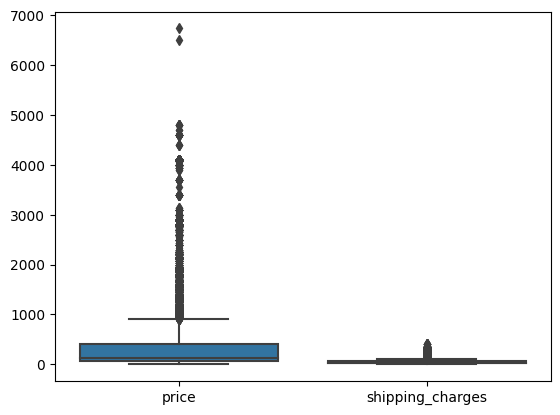

In [75]:
sns.boxplot(data=dft_orderitems)

## DF Customers EDA

In [76]:
dft_customers.isnull().sum()

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [77]:
dft_customers.nunique()

customer_id                 89316
customer_zip_code_prefix    13930
customer_city                3735
customer_state                 27
dtype: int64

# Feature Engineering

In [78]:
dft_products.head(2)

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_quantity
0,90K0C1fIyQUf,toys,491.0,19.0,12.0,16.0,13
1,qejhpMGGVcsl,watches_gifts,440.0,18.0,14.0,17.0,3


In [79]:
# Feature Creation on dft products

dft_products['product_size_cm'] = dft_products['product_length_cm'] * dft_products['product_height_cm'] * dft_products['product_width_cm']
dft_products.head(3)

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_quantity,product_size_cm
0,90K0C1fIyQUf,toys,491.0,19.0,12.0,16.0,13,3648.0
1,qejhpMGGVcsl,watches_gifts,440.0,18.0,14.0,17.0,3,4284.0
2,qUS5d2pEAyxJ,costruction_tools_garden,2200.0,16.0,16.0,16.0,5,4096.0


In [80]:
dft_payments.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,Axfy13Hk4PIk,1,credit_card,1,259.14
1,v6px92oS8cLG,1,credit_card,8,382.39


In [81]:
dft_orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24


In [82]:
dft_orderitems.head(2)

,order_id,product_id,seller_id,price,shipping_charges
0,Axfy13Hk4PIk,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65
1,v6px92oS8cLG,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79


In [83]:
dft_customers.head(2)

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,hCT0x9JiGXBQ,58125,varzea paulista,SP
1,PxA7fv9spyhx,3112,armacao dos buzios,RJ


## Feature Selection

In [84]:
dft_products['product_id'].duplicated().count()

27449

In [85]:
dft_products = dft_products.drop_duplicates(subset='product_id')
dft_products['product_id'].nunique()

27449

In [86]:
dft_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27449 entries, 0 to 89315
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             27449 non-null  object 
 1   product_category_name  27308 non-null  object 
 2   product_weight_g       27449 non-null  float64
 3   product_length_cm      27449 non-null  float64
 4   product_height_cm      27449 non-null  float64
 5   product_width_cm       27449 non-null  float64
 6   product_quantity       27449 non-null  int64  
 7   product_size_cm        27449 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.9+ MB


In [87]:
combined_df = dft_customers.merge(dft_orders, on='customer_id', how='inner')

# Merge the rest of the DataFrames one by one
combined_df = combined_df.merge(dft_orderitems, on='order_id', how='inner')
combined_df = combined_df.merge(dft_payments, on='order_id', how='inner')
combined_df = combined_df.merge(dft_products, on='product_id', how='inner')

In [88]:
# Merge dft_orderitems with dft_products on 'product_id'
merged_orderitems_products = dft_orderitems.merge(dft_products[['product_id', 'product_weight_g', 'product_size_cm']], on='product_id', how='left')

# Merge dft_orders with merged_orderitems_products on 'order_id'
merged_orders = merged_orderitems_products.merge(dft_orders[['order_id','customer_id', 'order_status', 'order_delivered_timestamp', 'order_estimated_delivery_date']], on='order_id', how='inner')

# Merge dft_customers with merged_orders on 'customer_id'
final_merged_data = merged_orders.merge(dft_customers[['customer_id', 'customer_zip_code_prefix']], on='customer_id', how='left')

final_merged_data.head(3)

,order_id,product_id,seller_id,price,shipping_charges,product_weight_g,product_size_cm,customer_id,order_status,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix
0,Axfy13Hk4PIk,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,491.0,3648.0,hCT0x9JiGXBQ,delivered,2017-10-26 22:19:52,2017-11-09,58125
1,v6px92oS8cLG,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79,440.0,4284.0,PxA7fv9spyhx,delivered,2018-07-03 22:51:22,2018-07-24,3112
2,Ulpf9skrhjfm,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,17.38,2200.0,4096.0,g3nXeJkGI0Qw,delivered,2018-02-27 01:29:50,2018-03-08,4119


In [89]:
final_merged_data.drop(columns='price', inplace=True)

In [90]:
final_merged_data['order_id'].apply(len).mean()

12.0

In [91]:
final_merged_data['product_id'].apply(len).mean()

12.0

In [92]:
final_merged_data['seller_id'].apply(len).mean()

12.0

In [93]:
final_merged_data['customer_id'].apply(len).mean()

12.0

In [94]:
final_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88364 entries, 0 to 88363
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       88364 non-null  object        
 1   product_id                     88364 non-null  object        
 2   seller_id                      88364 non-null  object        
 3   shipping_charges               88364 non-null  float64       
 4   product_weight_g               88349 non-null  float64       
 5   product_size_cm                88349 non-null  float64       
 6   customer_id                    88364 non-null  object        
 7   order_status                   88364 non-null  object        
 8   order_delivered_timestamp      88364 non-null  datetime64[ns]
 9   order_estimated_delivery_date  88364 non-null  object        
 10  customer_zip_code_prefix       88364 non-null  int64         
dtypes: datetime64[n

In [95]:
final_merged_data['order_delivered_timestamp'] = pd.to_datetime(final_merged_data['order_delivered_timestamp'])
final_merged_data['order_estimated_delivery_date'] = pd.to_datetime(final_merged_data['order_estimated_delivery_date'])
final_merged_data['is_late'] = final_merged_data.apply(lambda row: 1 if row['order_delivered_timestamp'] > row['order_estimated_delivery_date'] else 0, axis=1)

In [96]:
combined_df['order_delivered_timestamp'] = pd.to_datetime(combined_df['order_delivered_timestamp'])
combined_df['order_estimated_delivery_date'] = pd.to_datetime(combined_df['order_estimated_delivery_date'])
combined_df['is_late'] = combined_df.apply(lambda row: 1 if row['order_delivered_timestamp'] > row['order_estimated_delivery_date'] else 0, axis=1)

In [97]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88348 entries, 0 to 88347
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    88348 non-null  object        
 1   customer_zip_code_prefix       88348 non-null  int64         
 2   customer_city                  88348 non-null  object        
 3   customer_state                 88348 non-null  object        
 4   order_id                       88348 non-null  object        
 5   order_status                   88348 non-null  object        
 6   order_purchase_timestamp       88348 non-null  object        
 7   order_approved_at              88339 non-null  object        
 8   order_delivered_timestamp      88348 non-null  datetime64[ns]
 9   order_estimated_delivery_date  88348 non-null  datetime64[ns]
 10  product_id                     88348 non-null  object        
 11  seller_id      

In [98]:
final_merged_data.isnull().sum()

order_id                          0
product_id                        0
seller_id                         0
shipping_charges                  0
product_weight_g                 15
product_size_cm                  15
customer_id                       0
order_status                      0
order_delivered_timestamp         0
order_estimated_delivery_date     0
customer_zip_code_prefix          0
is_late                           0
dtype: int64

In [99]:
final_merged_data.dropna(axis=0, inplace=True)

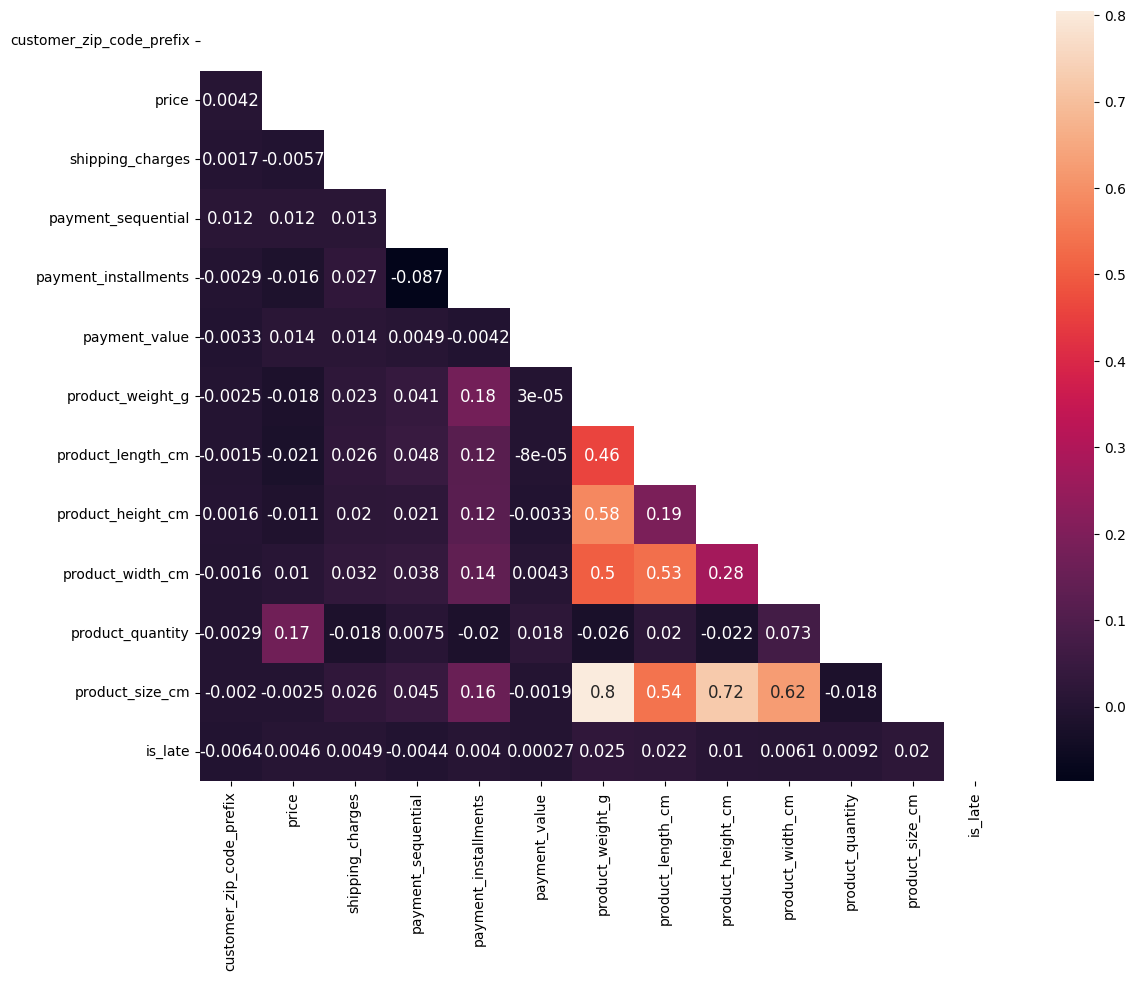

In [100]:
df_corr = combined_df.corr()

plt.figure(figsize=(13,10))
sns.heatmap(df_corr, annot=True, annot_kws={'size':12}, mask = np.triu(df_corr))

plt.show()

In [101]:
final_merged_data = final_merged_data[(final_merged_data['order_status'] == 'delivered') | ((final_merged_data['order_status'] == 'shipped') & (final_merged_data['is_late'] == 1))]

In [102]:
final_merged_data = final_merged_data[final_merged_data['order_status'] == 'delivered']

In [103]:
final_merged_data['is_late'].value_counts()

0    80675
1     6738
Name: is_late, dtype: int64

In [104]:
final_merged_data[(final_merged_data['order_status'] == 'shipped') & (final_merged_data['is_late'] == 0)]

,order_id,product_id,seller_id,shipping_charges,product_weight_g,product_size_cm,customer_id,order_status,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,is_late


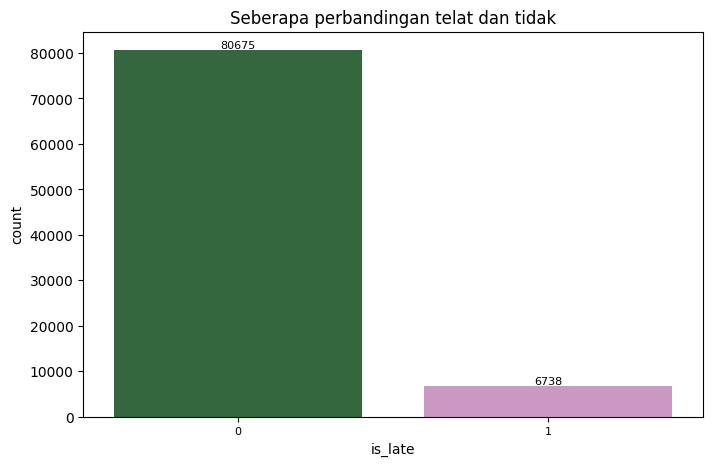

In [105]:
final_merged_data['is_late'].unique()


plt.figure(figsize = (8,5))
ax = sns.countplot(data = final_merged_data,x = "is_late", palette ='cubehelix')
plt.title("Seberapa perbandingan telat dan tidak")
ax.set_xticklabels(ax.get_xticklabels(), ha='center', fontsize=8)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8)


plt.show()

In [106]:
from sklearn.utils import resample

In [107]:
n_samples_majority = len(final_merged_data[final_merged_data['is_late'] == 0])
df_late = resample(final_merged_data[final_merged_data['is_late'] == 1],
                   replace=True,
                   n_samples=n_samples_majority,
                   random_state=42)

# Combine the resampled minority class with the majority class
df_balanced = pd.concat([df_late, final_merged_data[final_merged_data['is_late'] == 0]])

In [108]:
# Resample the classes with a lower n_samples
n_samples = min(len(final_merged_data[final_merged_data['is_late'] == 0]), len(final_merged_data[final_merged_data['is_late'] == 1]))

df_intime = resample(final_merged_data[final_merged_data['is_late'] == 0], 
                   replace=True,    
                   n_samples=6500,    
                   random_state=42)

df_late = resample(final_merged_data[final_merged_data['is_late'] == 1], 
                   replace=True,    
                   n_samples=6500,    
                   random_state=42) 

# Combine
final_merged_data = pd.concat([df_intime, df_late])
final_merged_data['is_late'].value_counts()

0    6500
1    6500
Name: is_late, dtype: int64

In [109]:
df_balanced['is_late'].value_counts()

1    80675
0    80675
Name: is_late, dtype: int64

In [110]:
df_balanced.reset_index(inplace=True)

# Encoding Final Merged Data

In [111]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Modeling

In [113]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161350 entries, 0 to 161349
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   index                          161350 non-null  int64         
 1   order_id                       161350 non-null  object        
 2   product_id                     161350 non-null  object        
 3   seller_id                      161350 non-null  object        
 4   shipping_charges               161350 non-null  float64       
 5   product_weight_g               161350 non-null  float64       
 6   product_size_cm                161350 non-null  float64       
 7   customer_id                    161350 non-null  object        
 8   order_status                   161350 non-null  object        
 9   order_delivered_timestamp      161350 non-null  datetime64[ns]
 10  order_estimated_delivery_date  161350 non-null  datetime64[ns]
 11  

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X = df_balanced[['shipping_charges', 'product_weight_g', 'product_size_cm', 'customer_zip_code_prefix']]
y = df_balanced['is_late']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
from xgboost import XGBClassifier

In [142]:
LR = RandomForestClassifier()
LR.fit(X_train, y_train)

RandomForestClassifier()

In [143]:
# Model Prediction
y_pred_train = LR.predict(X_train)
y_pred_train

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [144]:
y_pred_test = LR.predict(X_test)
y_pred_test

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [145]:
# Model Prediction Probability
LR.predict_proba(X_test)

array([[0.74, 0.26],
       [0.95, 0.05],
       [0.97, 0.03],
       ...,
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.  , 1.  ]])

In [146]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [147]:
# Model Evaluation function
def model_evaluation(model, pred, xtrain, ytrain, xtest, ytest):
    print('Accuracy : %.3f' % accuracy_score(ytest, pred))
    print('Precision : %.3f' % precision_score(ytest, pred))
    print('Recall : %.3f' % recall_score(ytest, pred))
    print('F-1Score : %.3f' % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) 
    print('ROC AUC : %.3f' % auc(fpr, tpr))
    
    # Average precision score
    average_precision = average_precision_score(ytest, pred)
    print('AP : %.3f'% average_precision)

In [148]:
model_evaluation(LR, y_pred_test, X_train, y_pred_train, X_test, y_test)

Accuracy : 0.991
Precision : 0.982
Recall : 1.000
F-1Score : 0.991
ROC AUC : 0.991
AP : 0.982


In [149]:
print("Train accuracy: ",LR.score(X_train,y_train))

Train accuracy:  0.9996777179122731


In [150]:
print("Train accuracy: ",LR.score(X_test,y_test))

Train accuracy:  0.9907779265208984


In [151]:
print("Train accuracy: ",LR.score(X_test,y_pred_test))

Train accuracy:  1.0


In [152]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     20300
           1       0.98      1.00      0.99     20038

    accuracy                           0.99     40338
   macro avg       0.99      0.99      0.99     40338
weighted avg       0.99      0.99      0.99     40338



In [153]:
conf_mat = confusion_matrix(y_test, y_pred_test)

Text(0.5, 1.0, '\nResult w/ LR Model\n')

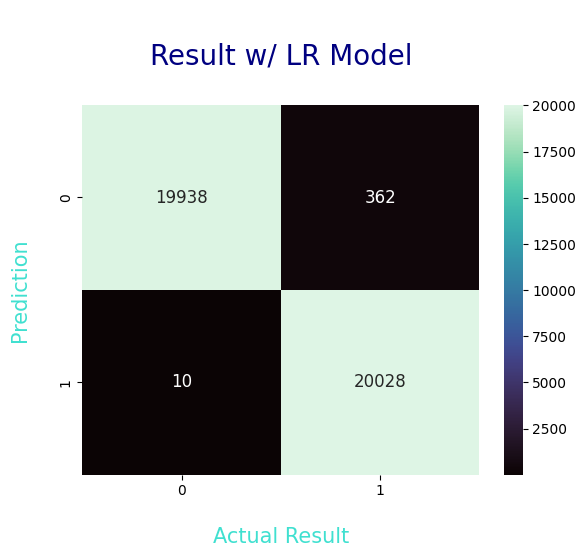

In [154]:
label = [0,1]
sns.heatmap(
    conf_mat, 
    xticklabels=label, 
    yticklabels=label, 
    fmt='d', 
    annot_kws={'size':12},
    annot = True,
    cmap = 'mako'
    )
plt.xlabel('\nActual Result', fontsize=15, color='turquoise')
plt.ylabel('Prediction\n', fontsize=15, color='turquoise')
plt.title('\nResult w/ LR Model\n',  fontsize=20, color='navy')

## Parameter Tuning

In [131]:
from sklearn.model_selection import GridSearchCV

In [136]:
# defining parameter range
param_grid = {
    'n_estimators': [10, 100, 200],
    'random_state': [0, 42, 123]
}

grid_search = GridSearchCV(LR, param_grid, scoring='accuracy', verbose=3)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ...n_estimators=10, random_state=0;, score=0.980 total time=   1.6s
[CV 2/5] END ...n_estimators=10, random_state=0;, score=0.980 total time=   1.7s
[CV 3/5] END ...n_estimators=10, random_state=0;, score=0.979 total time=   1.7s
[CV 4/5] END ...n_estimators=10, random_state=0;, score=0.981 total time=   1.6s
[CV 5/5] END ...n_estimators=10, random_state=0;, score=0.980 total time=   1.7s
[CV 1/5] END ..n_estimators=10, random_state=42;, score=0.980 total time=   1.6s
[CV 2/5] END ..n_estimators=10, random_state=42;, score=0.980 total time=   1.7s
[CV 3/5] END ..n_estimators=10, random_state=42;, score=0.980 total time=   1.7s
[CV 4/5] END ..n_estimators=10, random_state=42;, score=0.981 total time=   1.6s
[CV 5/5] END ..n_estimators=10, random_state=42;, score=0.980 total time=   1.7s
[CV 1/5] END .n_estimators=10, random_state=123;, score=0.980 total time=   1.6s
[CV 2/5] END .n_estimators=10, random_state=123;,

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 100, 200],
                         'random_state': [0, 42, 123]},
             scoring='accuracy', verbose=3)

In [137]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("\nBest Estimator:", best_estimator)

Best Parameters: {'n_estimators': 200, 'random_state': 123}

Best Estimator: RandomForestClassifier(n_estimators=200, random_state=123)


## Modelling After Tune

In [138]:
RFC = RandomForestClassifier(n_estimators=200, random_state=123)
RFC.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=123)

In [174]:
# Model Prediction
y_pred_train = RFC.predict(X_train)
y_pred_train

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [175]:
y_pred_test = RFC.predict(X_test)
y_pred_test

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [177]:
# Model Prediction Probability
RFC.predict_proba(X_test)

array([[0.69 , 0.31 ],
       [0.975, 0.025],
       [0.945, 0.055],
       ...,
       [0.   , 1.   ],
       [0.   , 1.   ],
       [0.06 , 0.94 ]])

In [178]:
model_evaluation(LR, y_pred_test, X_train, y_pred_train, X_test, y_test)

Accuracy : 0.989
Precision : 0.978
Recall : 0.999
F-1Score : 0.989
ROC AUC : 0.989
AP : 0.978


In [179]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     20300
           1       0.98      1.00      0.99     20038

    accuracy                           0.99     40338
   macro avg       0.99      0.99      0.99     40338
weighted avg       0.99      0.99      0.99     40338



In [180]:
conf_mat = confusion_matrix(y_test, y_pred_test)

Text(0.5, 1.0, '\nResult w/ LR Model\n')

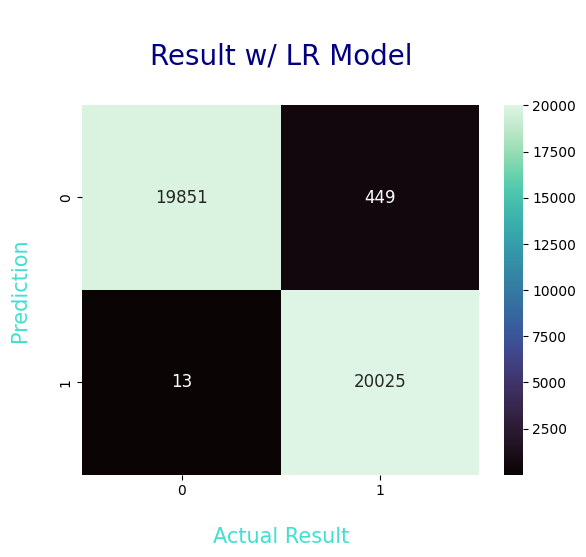

In [181]:
label = [0,1]
sns.heatmap(
    conf_mat, 
    xticklabels=label, 
    yticklabels=label, 
    fmt='d', 
    annot_kws={'size':12},
    annot = True,
    cmap = 'mako'
    )
plt.xlabel('\nActual Result', fontsize=15, color='turquoise')
plt.ylabel('Prediction\n', fontsize=15, color='turquoise')
plt.title('\nResult w/ LR Model\n',  fontsize=20, color='navy')

# Predict

In [155]:
df_test = pd.read_csv('test_order_id.csv')
df_test.head()

,order_id
0,u6rPMRAYIGig
1,ohY8f4FEbX19
2,I28liQek73i2
3,bBG1T89mlY8W
4,CYxJJSQS8Lbo


In [156]:
dfs_customers = pd.read_csv('test/df_Customers.csv')
dfs_customers

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,I74lXDOfoqsp,6020,goiania,GO
1,47TuLHF2s7X5,23020,viamao,RS
2,dQ0dqI8Qwlj8,75094,campinas,SP
3,iQCmWhNkIczb,89284,santana de parnaiba,SP
4,Dp2g6JH8tO5Z,39810,aripuana,MT
...,...,...,...,...
38274,Dw3aCTFf4Q4G,26160,guarulhos,SP
38275,JmHJqJvpVcJs,39628,rio de janeiro,RJ
38276,ro5DikwWCC3j,89284,santana de parnaiba,SP
38277,R25nE2rl77AU,60867,sao paulo,SP


In [157]:
dfs_customers.isnull().sum()

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [158]:
dfs_orderitems = pd.read_csv('test/df_OrderItems.csv')
dfs_orderitems

,order_id,product_id,seller_id,price,shipping_charges
0,u6rPMRAYIGig,1slxdgbgWFax,3jwvL6ihC45G,24.10,20.90
1,ohY8f4FEbX19,77PgsiElQLeB,GlLj704QXlDB,42.89,12.28
2,I28liQek73i2,QVlD26X1y7NI,V3iKL8r9W9NR,50.21,67.11
3,bBG1T89mlY8W,yWlFGkKYfrpa,RNBdBKsXebna,89.10,62.05
4,CYxJJSQS8Lbo,h6MCbrwh5kiC,5Ja2lH0N2OZt,2139.99,9.41
...,...,...,...,...,...
38274,QKBW3XKevmfn,wr6barwyoaIE,XURInBuULfIO,99.25,37.66
38275,Tjiw9bj8HtLr,sPZVXBD9lf3e,wR4cqCClYDyY,86.32,40.98
38276,mCPofb7A1aTq,Th6SHMsyTOMH,Gp2lLacVPwug,104.45,30.24
38277,scVuqN10zbgb,PyjlDSHRGdSt,al4fWZ5NFQzG,223.87,74.75


In [159]:
dfs_orderitems.isnull().sum()

order_id            0
product_id          0
seller_id           0
price               0
shipping_charges    0
dtype: int64

In [216]:
dfs_orderitems[dfs_orderitems['shipping_charges'] == 0]

,order_id,product_id,seller_id,price,shipping_charges
534,QNVf567QxsCo,A7eV4h2TnTa4,K0qPVGdA91KO,739.98,0.0
2198,4AyYsTQ3aCp6,bJWTdVsrXOgZ,3cqSxyYyqpx6,128.99,0.0
6670,oZBtcBmNFxEO,HsFiyFnoBoF8,3Alp7oIhUtGc,262.90,0.0
8995,Jdp0d7LIPstg,ZeMdY9hO43n5,QJqtwyqcLSPb,100.00,0.0
10345,bQSPtPgmgyf9,zSVPrxby4WSC,5Ja2lH0N2OZt,91.33,0.0
19798,YUpcUjc46BTo,6Pva1xPmHzTF,2Vzr14MB7bRD,867.77,0.0
22277,ZMO5X9y0o6wS,cNFm1SLJtLfa,elOz7hGMAfs7,13.61,0.0
26081,2lMfw9cI2wzJ,OiWsX4StHP7E,LWDhDrMk55bN,159.90,0.0
27046,MLi29bIN5elQ,6Ww1i7qd1Zqu,YVBAT3QqF9Qj,71.80,0.0
28319,r0awaedNsDOS,5EWnZ1mRjH3i,hB0eH2oAUtkk,91.33,0.0


In [160]:
dfs_orders = pd.read_csv('test/df_Orders.csv')
dfs_orders

,order_id,customer_id,order_purchase_timestamp,order_approved_at
0,u6rPMRAYIGig,I74lXDOfoqsp,2017-11-18 12:29:57,2017-11-18 12:46:08
1,ohY8f4FEbX19,47TuLHF2s7X5,2018-06-02 17:13:12,2018-06-02 20:12:23
2,I28liQek73i2,dQ0dqI8Qwlj8,2018-01-08 11:01:30,2018-01-09 07:24:03
3,bBG1T89mlY8W,iQCmWhNkIczb,2017-03-10 10:24:46,2017-03-10 10:24:46
4,CYxJJSQS8Lbo,Dp2g6JH8tO5Z,2017-12-02 10:04:07,2017-12-05 04:13:30
...,...,...,...,...
38274,QKBW3XKevmfn,Dw3aCTFf4Q4G,2018-08-24 11:54:56,2018-08-24 12:05:22
38275,Tjiw9bj8HtLr,JmHJqJvpVcJs,2017-03-25 20:39:11,2017-03-25 20:50:17
38276,mCPofb7A1aTq,ro5DikwWCC3j,2018-08-16 13:39:30,2018-08-17 03:31:06
38277,scVuqN10zbgb,R25nE2rl77AU,2018-06-27 13:17:05,2018-06-28 08:50:58


In [162]:
dfs_orders.isnull().sum()

order_id                    0
customer_id                 0
order_purchase_timestamp    0
order_approved_at           7
dtype: int64

In [163]:
dfs_products = pd.read_csv('test/df_Products.csv')
dfs_products

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1slxdgbgWFax,toys,50.0,16.0,5.0,11.0
1,77PgsiElQLeB,electronics,200.0,21.0,7.0,14.0
2,QVlD26X1y7NI,furniture_decor,1000.0,100.0,5.0,20.0
3,yWlFGkKYfrpa,toys,8950.0,40.0,30.0,40.0
4,h6MCbrwh5kiC,toys,2301.0,32.0,35.0,34.0
...,...,...,...,...,...,...
38274,wr6barwyoaIE,toys,200.0,16.0,28.0,11.0
38275,sPZVXBD9lf3e,toys,5150.0,22.0,3.0,22.0
38276,Th6SHMsyTOMH,toys,430.0,21.0,11.0,17.0
38277,PyjlDSHRGdSt,toys,1850.0,24.0,36.0,23.0


In [168]:
dfs_products[dfs_products['product_weight_g'] == 0]

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
20412,aMbBkxpim3xt,toys,0.0,30.0,25.0,30.0
35000,aMbBkxpim3xt,toys,0.0,30.0,25.0,30.0


In [175]:
dfs_products.loc[dfs_products['product_weight_g'] == 0.0, 'product_weight_g'] = 2113.0

In [172]:
dft_products

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_quantity,product_size_cm
0,90K0C1fIyQUf,toys,491.0,19.0,12.0,16.0,13,3648.0
1,qejhpMGGVcsl,watches_gifts,440.0,18.0,14.0,17.0,3,4284.0
2,qUS5d2pEAyxJ,costruction_tools_garden,2200.0,16.0,16.0,16.0,5,4096.0
3,639iGvMyv0De,toys,1450.0,68.0,3.0,48.0,6,9792.0
4,1lycYGcsic2F,toys,300.0,17.0,4.0,12.0,13,816.0
...,...,...,...,...,...,...,...,...
89291,USSzekoHkA25,toys,1352.0,37.0,9.0,30.0,1,9990.0
89297,SZRgDV7xa2U8,toys,1360.0,28.0,21.0,24.0,1,14112.0
89303,w2OtdEjwNHBr,toys,833.0,17.0,12.0,16.0,1,3264.0
89311,W8vikEizUggJ,toys,700.0,21.0,14.0,14.0,1,4116.0


In [173]:
import pandas as pd

# Assuming you have a DataFrame named dft_products
# Filter rows where product_size is equal to 22500
filtered_df = dft_products[dft_products['product_size_cm'] == 22500]

# Calculate the mean of the product_weight column in the filtered DataFrame
mean_product_weight = filtered_df['product_weight_g'].mean()

# Print the mean value
print("Mean product_weight for product_size 22500:", mean_product_weight)

Mean product_weight for product_size 22500: 2113.0


In [177]:
dfs_products.isnull().sum()

product_id                 0
product_category_name    168
product_weight_g          10
product_length_cm         10
product_height_cm         10
product_width_cm          10
dtype: int64

In [178]:
def check_n_weight():
    if dfs_products['product_weight_g'].skew() > -0.5 and dfs_products['product_weight_g'].skew() < 0.5:
        print('Weight Normal')
    else:
        print('Weight Not Normal')

def check_n_length():
    if dfs_products['product_length_cm'].skew() > -0.5 and dfs_products['product_length_cm'].skew() < 0.5:
        print('Length Normal')
    else:
        print('Length Not Normal')

In [179]:
check_n_length()
check_n_weight()

Length Not Normal
Weight Not Normal


In [181]:
dfs_products[dfs_products['product_weight_g'].isnull()]

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
2043,zX9HL81jfvr2,toys,NaN,NaN,NaN,NaN
3012,zX9HL81jfvr2,toys,NaN,NaN,NaN,NaN
6895,zX9HL81jfvr2,toys,NaN,NaN,NaN,NaN
11041,zX9HL81jfvr2,toys,NaN,NaN,NaN,NaN
13814,zX9HL81jfvr2,toys,NaN,NaN,NaN,NaN
20892,zX9HL81jfvr2,toys,NaN,NaN,NaN,NaN
21283,zX9HL81jfvr2,toys,NaN,NaN,NaN,NaN
29787,zX9HL81jfvr2,toys,NaN,NaN,NaN,NaN
31543,zX9HL81jfvr2,toys,NaN,NaN,NaN,NaN
35886,zX9HL81jfvr2,toys,NaN,NaN,NaN,NaN


In [182]:
dft_products[dft_products['product_id'] == 'zX9HL81jfvr2']

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_quantity,product_size_cm


In [183]:
# Calculate the medians for the columns with missing values
median_weight = dfs_products['product_weight_g'].mean()
median_length = dfs_products['product_length_cm'].mean()
median_height = dfs_products['product_height_cm'].mean()
median_width = dfs_products['product_width_cm'].mean()

# Fill missing values with medians
dfs_products['product_weight_g'].fillna(median_weight, inplace=True)
dfs_products['product_length_cm'].fillna(median_length, inplace=True)
dfs_products['product_height_cm'].fillna(median_height, inplace=True)
dfs_products['product_width_cm'].fillna(median_width, inplace=True)

# Verify that missing values have been filled
dfs_products.isnull().sum()

product_id                 0
product_category_name    168
product_weight_g           0
product_length_cm          0
product_height_cm          0
product_width_cm           0
dtype: int64

In [184]:
dfs_products['product_size_cm'] = dfs_products['product_length_cm'] * dfs_products['product_height_cm'] * dfs_products['product_width_cm']
dfs_products.head(3)

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_size_cm
0,1slxdgbgWFax,toys,50.0,16.0,5.0,11.0,880.0
1,77PgsiElQLeB,electronics,200.0,21.0,7.0,14.0,2058.0
2,QVlD26X1y7NI,furniture_decor,1000.0,100.0,5.0,20.0,10000.0


In [185]:
# Merge dfs_orderitems with dfs_products on 'product_id'
merged_predict = dfs_orderitems.merge(dfs_products[['product_id', 'product_weight_g', 'product_size_cm']], on='product_id', how='inner')

# Merge dfs_orders with merged_predict on 'order_id'
merged_test = merged_predict.merge(dfs_orders[['order_id','customer_id']], on='order_id', how='inner')

# Merge dfs_customers with merged_test on 'customer_id'
final_merged_predict = merged_test.merge(dfs_customers[['customer_id', 'customer_zip_code_prefix']], on='customer_id', how='inner')

final_merged_predict

,order_id,product_id,seller_id,price,shipping_charges,product_weight_g,product_size_cm,customer_id,customer_zip_code_prefix
0,u6rPMRAYIGig,1slxdgbgWFax,3jwvL6ihC45G,24.10,20.90,50.0,880.0,I74lXDOfoqsp,6020
1,u6rPMRAYIGig,1slxdgbgWFax,3jwvL6ihC45G,24.10,20.90,50.0,880.0,I74lXDOfoqsp,6020
2,u6rPMRAYIGig,1slxdgbgWFax,3jwvL6ihC45G,24.10,20.90,50.0,880.0,I74lXDOfoqsp,6020
3,W883pN454zIH,1slxdgbgWFax,3jwvL6ihC45G,24.10,34.33,50.0,880.0,e3ksInKCwOpH,18602
4,W883pN454zIH,1slxdgbgWFax,3jwvL6ihC45G,24.10,34.33,50.0,880.0,e3ksInKCwOpH,18602
...,...,...,...,...,...,...,...,...,...
483178,C6RN6xwcBVTe,x9UUywsqT92P,bgjDgOSuQsll,299.99,40.61,375.0,3120.0,yWToFHb5Gmi3,3081
483179,tkxVd3HFludF,xltST60MG76S,WG2pVERAEzeW,171.90,32.95,800.0,15040.0,7yKRFDkrX5YA,15806
483180,DI3Jz2puVexJ,Siea5ovIiWWX,9fFFM6RBxCkT,264.50,38.63,900.0,27000.0,dfso2oEhmURl,78850
483181,kmViZI3t6fUT,LgjNH8kpQyJg,VjbLhhR5I7ly,78.55,26.99,650.0,1760.0,nh2pmBHvyIzL,54150


In [186]:
final_merged_predict.drop_duplicates(subset='order_id', inplace=True)
final_merged_predict

,order_id,product_id,seller_id,price,shipping_charges,product_weight_g,product_size_cm,customer_id,customer_zip_code_prefix
0,u6rPMRAYIGig,1slxdgbgWFax,3jwvL6ihC45G,24.10,20.90,50.0,880.0,I74lXDOfoqsp,6020
3,W883pN454zIH,1slxdgbgWFax,3jwvL6ihC45G,24.10,34.33,50.0,880.0,e3ksInKCwOpH,18602
6,S7zJd1ziBFGA,1slxdgbgWFax,3jwvL6ihC45G,153.75,34.33,50.0,880.0,f3X7sB3PMDQW,21550
9,ohY8f4FEbX19,77PgsiElQLeB,GlLj704QXlDB,42.89,12.28,200.0,2058.0,47TuLHF2s7X5,23020
11,hI8Q4fQlN2Pu,77PgsiElQLeB,GlLj704QXlDB,42.89,6.87,200.0,2058.0,AMEUpUsNWG0z,40110
...,...,...,...,...,...,...,...,...,...
483178,C6RN6xwcBVTe,x9UUywsqT92P,bgjDgOSuQsll,299.99,40.61,375.0,3120.0,yWToFHb5Gmi3,3081
483179,tkxVd3HFludF,xltST60MG76S,WG2pVERAEzeW,171.90,32.95,800.0,15040.0,7yKRFDkrX5YA,15806
483180,DI3Jz2puVexJ,Siea5ovIiWWX,9fFFM6RBxCkT,264.50,38.63,900.0,27000.0,dfso2oEhmURl,78850
483181,kmViZI3t6fUT,LgjNH8kpQyJg,VjbLhhR5I7ly,78.55,26.99,650.0,1760.0,nh2pmBHvyIzL,54150


In [187]:
final_merged_predict.reset_index(inplace=True)

In [188]:
final_merged_predict = final_merged_predict[['shipping_charges', 'product_weight_g', 'product_size_cm', 'customer_zip_code_prefix']]

In [189]:
final_merged_predict.head(2)

,shipping_charges,product_weight_g,product_size_cm,customer_zip_code_prefix
0,20.90,50.0,880.0,6020
1,34.33,50.0,880.0,18602


In [190]:
final_merged_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38279 entries, 0 to 38278
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   shipping_charges          38279 non-null  float64
 1   product_weight_g          38279 non-null  float64
 2   product_size_cm           38279 non-null  float64
 3   customer_zip_code_prefix  38279 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 1.2 MB


In [191]:
predictions = LR.predict(final_merged_predict)

In [192]:
final_merged_predict["is_late"] = predictions

In [193]:
final_merged_predict.head()

,shipping_charges,product_weight_g,product_size_cm,customer_zip_code_prefix,is_late
0,20.90,50.0,880.0,6020,0
1,34.33,50.0,880.0,18602,0
2,34.33,50.0,880.0,21550,0
3,12.28,200.0,2058.0,23020,0
4,6.87,200.0,2058.0,40110,0


In [194]:
final_merged_predict.insert(0, 'order_id', df_test['order_id'])

In [195]:
final_merged_predict.head()

,order_id,shipping_charges,product_weight_g,product_size_cm,customer_zip_code_prefix,is_late
0,u6rPMRAYIGig,20.90,50.0,880.0,6020,0
1,ohY8f4FEbX19,34.33,50.0,880.0,18602,0
2,I28liQek73i2,34.33,50.0,880.0,21550,0
3,bBG1T89mlY8W,12.28,200.0,2058.0,23020,0
4,CYxJJSQS8Lbo,6.87,200.0,2058.0,40110,0


In [196]:
df_test

,order_id
0,u6rPMRAYIGig
1,ohY8f4FEbX19
2,I28liQek73i2
3,bBG1T89mlY8W
4,CYxJJSQS8Lbo
...,...
38274,QKBW3XKevmfn
38275,Tjiw9bj8HtLr
38276,mCPofb7A1aTq
38277,scVuqN10zbgb


In [197]:
sample = pd.read_csv('sample_submission.csv')
sample

,order_id,is_late
0,OhbVrpoiVgRV,0
1,5IfLBcbfnoGM,1
2,bJmTPSIAoCLr,0
3,Z3aWZkSBvrjn,0
4,9Wvgfygw2wMq,1
5,ZcUDIh7yfJs1,1
6,ON43xKmTecQo,0
7,Xsf2o3gyrDO1,0
8,xkxwnQrS7RPe,0
9,MOkIUpkDyr7O,0


In [198]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  10 non-null     object
 1   is_late   10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


In [199]:
final_predict = final_merged_predict[['order_id', 'is_late']]
final_predict

,order_id,is_late
0,u6rPMRAYIGig,0
1,ohY8f4FEbX19,0
2,I28liQek73i2,0
3,bBG1T89mlY8W,0
4,CYxJJSQS8Lbo,0
...,...,...
38274,QKBW3XKevmfn,0
38275,Tjiw9bj8HtLr,0
38276,mCPofb7A1aTq,0
38277,scVuqN10zbgb,0


In [200]:
final_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38279 entries, 0 to 38278
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  38279 non-null  object
 1   is_late   38279 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 598.2+ KB


In [201]:
final_predict['is_late'].value_counts()

0    36843
1     1436
Name: is_late, dtype: int64

In [202]:
final_predict.to_csv("Intelligo - ans 6.csv", index=False)